<a href="https://colab.research.google.com/github/DeepLearningSaeid/DeepLearningSaeid/blob/main/Weight_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Activation functions
def identity(x):
    return x

def square(x):
    return np.power(x, 2)/24

def square_(x):
    return np.power(x, 2)/720

def identity_derivative(x):
    return np.ones_like(x)

def square_derivative(x):
    return x/12

def square__derivative(x):
    return x/360

# Initialize network parameters
def initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    return {
        'W1': np.random.randn(input_size, hidden_size1) * 0.3,
        'b1': np.zeros((1, hidden_size1)),
        'W2': np.random.randn(input_size, hidden_size2) * 0.2,
        'b2': np.zeros((1, hidden_size2)),
        'W3': np.random.randn(hidden_size1 + hidden_size2, hidden_size3) * 0.003,
        'b3': np.zeros((1, hidden_size3)),
        'W4': np.random.randn(hidden_size3 + hidden_size1 + hidden_size2, output_size) * 0.002,
        'b4': np.zeros((1, output_size))
    }

# Forward pass
def forward_pass(X, params):
    Z1 = np.dot(X, params['W1']) + params['b1']
    A1 = identity(Z1)

    Z2 = np.dot(X, params['W2']) + params['b2']
    A2 = square(Z2)

    concatenated = np.concatenate((A1, A2), axis=1)

    Z3 = np.dot(concatenated, params['W3']) + params['b3']
    A3 = square_(Z3)

    concatenated_A3 = np.concatenate((A3, concatenated), axis=1)

    Z4 = np.dot(concatenated_A3, params['W4']) + params['b4']
    A4 = identity(Z4)  # Linear activation

    return A4, (X, Z1, A1, Z2, A2, Z3, A3, concatenated_A3, Z4, A4, concatenated)

# Compute loss (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Backward pass
def backward_pass(y_true, cache, params):
    X, Z1, A1, Z2, A2, Z3, A3, concatenated_A3, Z4, A4, concatenated = cache

    dA4 = 2 * (A4 - y_true)
    dZ4 = dA4 * identity_derivative(Z4)  # Derivative of linear activation is 1
    dW4 = np.dot(concatenated_A3.T, dZ4)
    db4 = np.sum(dZ4, axis=0, keepdims=True)

    d_concatenated_A3 = np.dot(dZ4, params['W4'].T)
    dA3 = d_concatenated_A3[:, :hidden_size3]
    d_concatenated = d_concatenated_A3[:, hidden_size3:]

    dZ3 = dA3 * square__derivative(Z3)
    dW3 = np.dot(concatenated.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = d_concatenated[:, hidden_size1:]  # Corrected dA2 calculation
    d_concatenated_Z2 = dA2 * square_derivative(Z2)

    dA1 = d_concatenated[:, :hidden_size1]
    dZ1 = dA1 * identity_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    dZ2 = d_concatenated_Z2
    dW2 = np.dot(X.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2, 'dW3': dW3, 'db3': db3, 'dW4': dW4, 'db4': db4}
    return grads

# Update network parameters
def update_parameters(params, grads, learning_rate):
    for key in params.keys():
        params[key] -= learning_rate * grads['d' + key]
    return params

# Load and preprocess the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_onehot = np.eye(3)[y]

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_onehot, test_size=0.2, random_state=42)

# Network architecture
input_size = X_train.shape[1]
hidden_size1 = 5
hidden_size2 = 5
hidden_size3 = 5
output_size = 3

# Initialize parameters
params = initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Training settings
epochs = 400
learning_rate = 0.001

# Training loop
for epoch in range(epochs):
    output, cache = forward_pass(X_train, params)
    loss = compute_loss(Y_train, output)
    grads = backward_pass(Y_train, cache, params)
    params = update_parameters(params, grads, learning_rate)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluate the model
output_test, _ = forward_pass(X_test, params)
test_loss = compute_loss(Y_test, output_test)
predictions = np.argmax(output_test, axis=1)
predictions_onehot = np.eye(output_size)[predictions]
accuracy = np.mean(np.all(predictions_onehot == Y_test, axis=1))

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 0.3326
Epoch 20, Loss: 0.1111
Epoch 40, Loss: 0.0979
Epoch 60, Loss: 0.0943
Epoch 80, Loss: 0.0936
Epoch 100, Loss: 0.0932
Epoch 120, Loss: 0.0929
Epoch 140, Loss: 0.0927
Epoch 160, Loss: 0.0924
Epoch 180, Loss: 0.0922
Epoch 200, Loss: 0.0919
Epoch 220, Loss: 0.0917
Epoch 240, Loss: 0.0914
Epoch 260, Loss: 0.0911
Epoch 280, Loss: 0.0907
Epoch 300, Loss: 0.0901
Epoch 320, Loss: 0.0894
Epoch 340, Loss: 0.0883
Epoch 360, Loss: 0.0867
Epoch 380, Loss: 0.0841
Test Loss: 0.0679
Test Accuracy: 0.9333


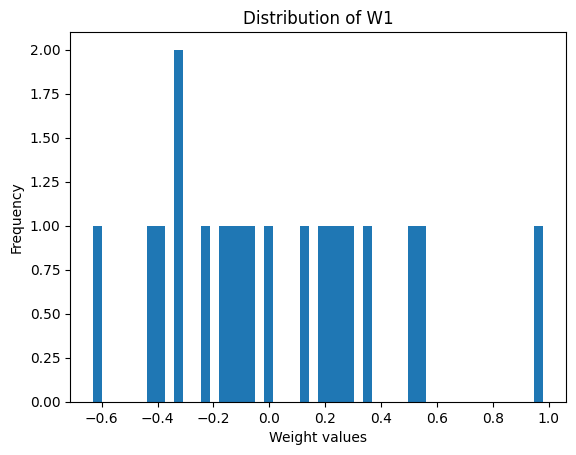

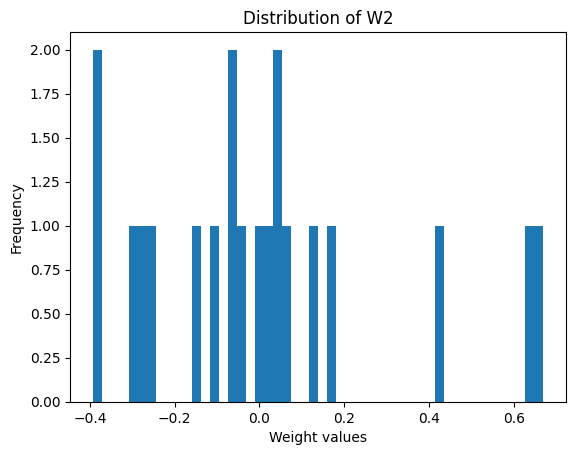

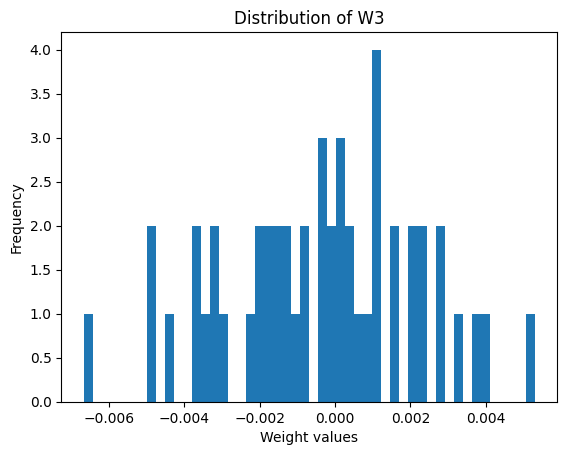

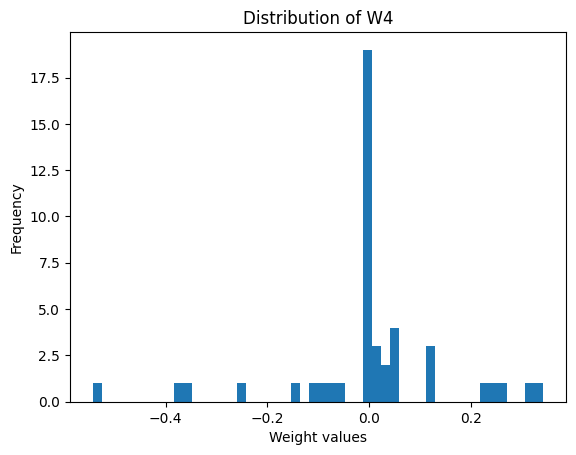

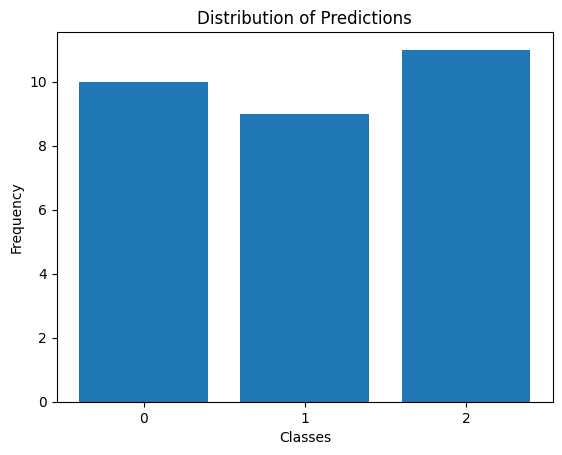

In [4]:
import matplotlib.pyplot as plt

# Analyze the distribution of weights
for key, value in params.items():
    if 'W' in key:  # Check if it's a weight matrix
        plt.hist(value.flatten(), bins=50)
        plt.title(f"Distribution of {key}")
        plt.xlabel("Weight values")
        plt.ylabel("Frequency")
        plt.show()

# Analyze the output predictions distribution
plt.hist(predictions, bins=np.arange(output_size + 1) - 0.5, rwidth=0.8)
plt.title("Distribution of Predictions")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(np.arange(output_size))
plt.show()


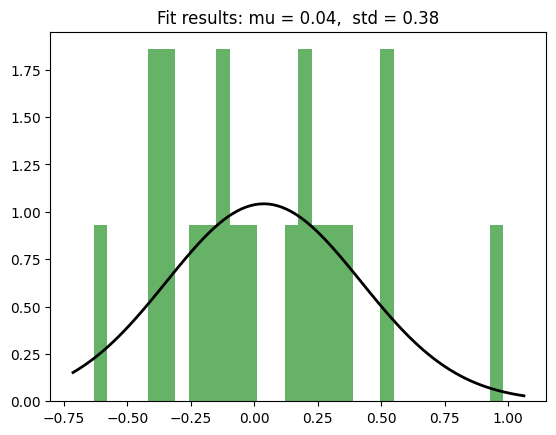

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assume we are approximating the weights of the first layer 'W1'
weights = params['W1'].flatten()  # Flatten the weights to make them 1-dimensional

# Fit a normal distribution to the weights
mu, std = stats.norm.fit(weights)

# Plot the histogram of the weights
plt.hist(weights, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()


In [7]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load and preprocess the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_onehot = np.eye(2)[y]  # One-hot encode target

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_onehot, test_size=0.2, random_state=42)

# Network architecture
input_size = X_train.shape[1]
hidden_size1 = 5
hidden_size2 = 5
hidden_size3 = 5
output_size = 2  # Two classes: benign and malignant

# Initialize parameters
params = initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Training settings
epochs = 200
learning_rate = 0.00001

# Training loop
for epoch in range(epochs):
    output, cache = forward_pass(X_train, params)
    loss = compute_loss(Y_train, output)
    grads = backward_pass(Y_train, cache, params)
    params = update_parameters(params, grads, learning_rate)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluate the model
output_test, _ = forward_pass(X_test, params)
test_loss = compute_loss(Y_test, output_test)
predictions = np.argmax(output_test, axis=1)
predictions_onehot = np.eye(output_size)[predictions]
accuracy = np.mean(np.all(predictions_onehot == Y_test, axis=1))

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 0.5026
Epoch 20, Loss: 0.3000
Epoch 40, Loss: 0.2342
Epoch 60, Loss: 0.1907
Epoch 80, Loss: 0.1603
Epoch 100, Loss: 0.1387
Epoch 120, Loss: 0.1232
Epoch 140, Loss: 0.1120
Epoch 160, Loss: 0.1038
Epoch 180, Loss: 0.0976
Test Loss: 0.0903
Test Accuracy: 0.9386


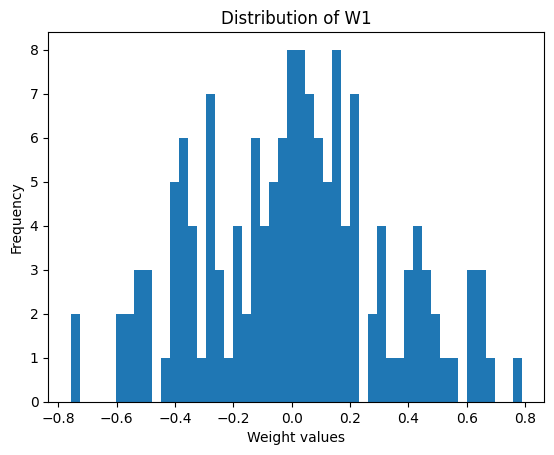

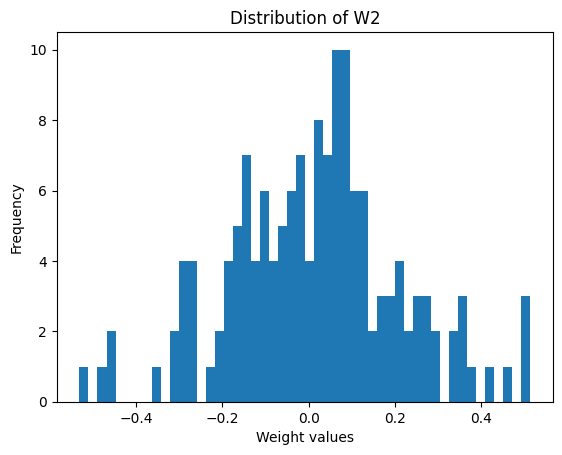

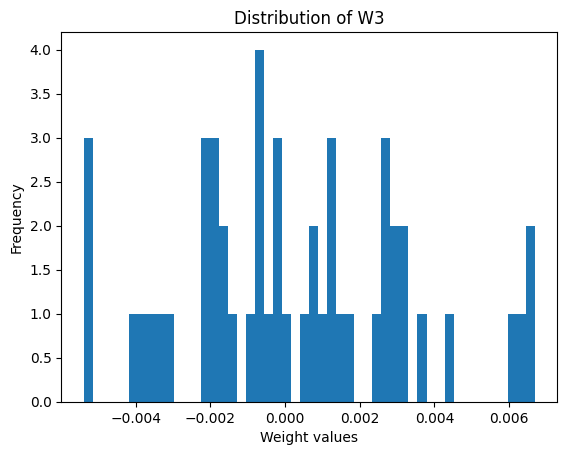

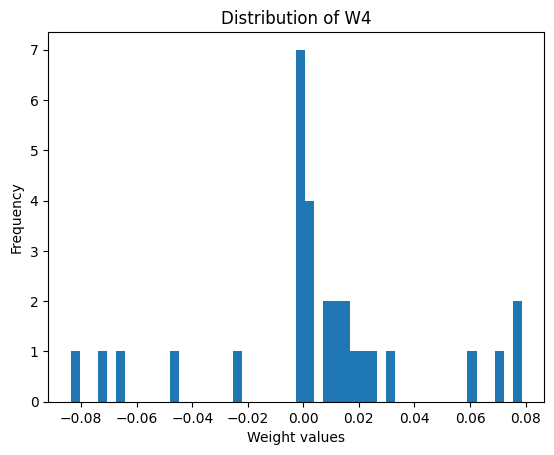

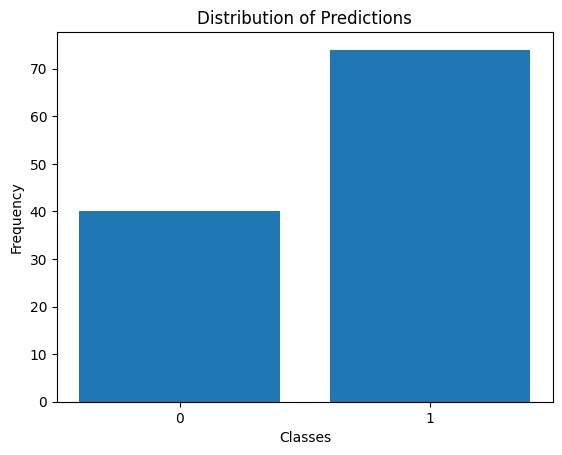

In [8]:
import matplotlib.pyplot as plt

# Analyze the distribution of weights
for key, value in params.items():
    if 'W' in key:  # Check if it's a weight matrix
        plt.hist(value.flatten(), bins=50)
        plt.title(f"Distribution of {key}")
        plt.xlabel("Weight values")
        plt.ylabel("Frequency")
        plt.show()

# Analyze the output predictions distribution
plt.hist(predictions, bins=np.arange(output_size + 1) - 0.5, rwidth=0.8)
plt.title("Distribution of Predictions")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(np.arange(output_size))
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, Dense, concatenate, Dropout, Flatten, Activation
from keras import backend as K
from keras.utils import get_custom_objects
from keras.utils import  to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist

In [10]:
batch_size = 128
num_classes = 10
epochs = 4

# Load the MNIST data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the input data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Convert input data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Add 10 to input data
x_train += 10
x_test += 10

# Normalize input data
x_train /= 500
x_test /= 500

# Print the number of train and test samples
print(f'{x_train.shape[0]} train samples')
print(f'{x_test.shape[0]} test samples')

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Set the number of train and test samples
num_train_samples = 60000
num_test_samples = 10000

# Select the required number of train and test samples
x_train = x_train[:num_train_samples, :]
x_test = x_test[:num_test_samples, :]

y_train = y_train[:num_train_samples]
y_test = y_test[:num_test_samples]

60000 train samples
10000 test samples


In [11]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import time

# Constants
batch_size = 128
num_classes = 10
epochs = 40

# Load the MNIST data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the input data
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# Convert input data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Add 10 to input data
x_train += 10
x_test += 10

# Normalize input data
x_train /= 500
x_test /= 500

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



input_size = 784
hidden_size1 = 300
hidden_size2 = 300
hidden_size3 = 300
output_size = num_classes



In [12]:
# Initialize parameters
params = initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Training settings
epochs = 20
learning_rate = 0.00001

# Training loop
for epoch in range(epochs):
    output, cache = forward_pass(x_train, params)
    loss = compute_loss(y_train, output)
    grads = backward_pass(y_train, cache, params)
    params = update_parameters(params, grads, learning_rate)

    if epoch % 2 == 0:  # Print loss every 2 epochs for brevity
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluate the model
output_test, _ = forward_pass(x_test, params)
test_loss = compute_loss(y_test, output_test)
predictions = np.argmax(output_test, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test_labels)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 0.1025
Epoch 2, Loss: 165746343998126.0938


KeyboardInterrupt: 